In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pr=pd.read_csv('PR.csv')
pr

,country,score,product
0,us,10.0,Samsung Galaxy S8
1,us,10.0,Samsung Galaxy S8
2,us,6.0,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,us,9.2,Samsung Galaxy S8 64GB (AT&T)
4,us,4.0,Samsung Galaxy S8
...,...,...,...
2567,br,10.0,Apple iPhone 6 Plus 64GB Cinza Espacial iOS 8 ...
2568,br,10.0,Apple iPhone 6 Plus 16GB Cinza Espacial iOS 8 ...
2569,br,10.0,Apple iPhone 6 Plus 16GB Cinza Espacial iOS 8 ...
2570,br,10.0,Apple iPhone 6 Plus 64GB


In [2]:
vocab_lis=['Samsung', 'Huawei', 'Apple']
pr['product'] = [' '.join(y for y in x.split() if y in vocab_lis) for x in pr['product']]
pr['product'] = pr['product'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')
pr = pr.replace(r'^\s*$', np.nan, regex=True)
pr['product'] = pr['product'].fillna('Apple')
pr

<ipython-input-2-2b4d99254077>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pr['product'] = pr['product'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')


,country,score,product
0,us,10.0,Samsung
1,us,10.0,Samsung
2,us,6.0,Samsung
3,us,9.2,Samsung
4,us,4.0,Samsung
...,...,...,...
2567,br,10.0,Apple
2568,br,10.0,Apple
2569,br,10.0,Apple
2570,br,10.0,Apple


In [3]:
AVGpr = pr.groupby('product').mean()
AVGpr

,score
product,
Apple,7.839181
Huawei,8.726415
Samsung,9.270630


Text(0.5, 1.0, 'product average score')

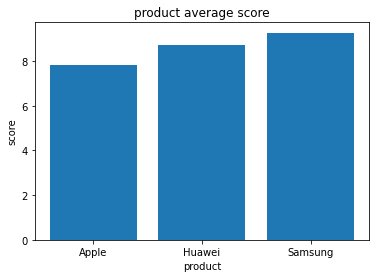

In [4]:
plt.bar(AVGpr.index.values ,AVGpr['score'].values)
plt.xlabel('product')
plt.ylabel('score')
 
plt.title("product average score")

In [5]:
cpr = pr.groupby(['country','product'], as_index=False).mean()
cpr

,country,product,score
0,au,Samsung,8.300000
1,be,Apple,9.000000
2,be,Samsung,7.500000
3,br,Apple,9.200000
4,br,Samsung,10.000000
5,ca,Huawei,8.000000
6,ca,Samsung,10.000000
7,cz,Apple,10.000000
8,cz,Samsung,10.000000
9,de,Apple,6.430769


In [6]:
best = cpr.groupby('country')['score'].transform(max) == cpr['score']
cpr[best]

,country,product,score
0,au,Samsung,8.300000
1,be,Apple,9.000000
4,br,Samsung,10.000000
6,ca,Samsung,10.000000
7,cz,Apple,10.000000
8,cz,Samsung,10.000000
9,de,Apple,6.430769
10,es,Apple,8.973684
12,fi,Apple,9.545455
15,fr,Samsung,9.000000
